## Основы pandas

![alt text](https://www.anaconda.com/wp-content/uploads/2019/11/pandas-logo-2.png)

В этом ноутбуке мы рассмотрим основы библиотеки pandas.

In [2]:
# импортируем библиотеку
import pandas as pd
import numpy as np

### Series

Одномерный набор данных. Отсутствующий данные записываются как `np.nan`, они не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.

In [4]:
l=[1,3,5,np.nan,6,8]
s=pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
pd.Series([[1,2,3,]])[0,1]

KeyError: 'key of type tuple not found and not a MultiIndex'

In [40]:
np.array([[1,2,3,]])[0,1]

2

### Полезная информация о датафрейме


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [44]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

### Индексация

Индексация по аналогии:

In [8]:
s[2]

5.0

In [10]:
s[2] = 7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [12]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [18]:
s1=s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
0 NaN

In [20]:
s2=s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64

### Сложение


В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [60]:
s1+s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64


К наборам данных можно применять функции из `numpy`

In [22]:
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [66]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

### Индексация

При создании набора данных s мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [24]:
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [26]:
s.index

RangeIndex(start=0, stop=6, step=1)


Но можно создавать наборы данных с индексом, заданным списком.

In [29]:
i=list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [35]:
s=pd.Series(l,index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

Если индекс - строка, то вместо s['c'] можно писать s.c.

In [50]:
s[]

5.0

In [110]:
s1 = s[1:]
s2 = s[:-1]
s1+s2

a     NaN
b     6.0
c    10.0
d     NaN
e    12.0
f     NaN
dtype: float64

Набор данных можно создать из словаря.

In [122]:
s=pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64

Можно отсортировать набор данных.

In [ ]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [ ]:
d = pd.date_range('20160101',periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
s=pd.Series(np.random.normal(size=10),index=d)
s

2016-01-01    0.230592
2016-01-02    0.634709
2016-01-03   -0.337821
2016-01-04   -0.490717
2016-01-05   -1.955437
2016-01-06   -0.136192
2016-01-07   -0.135905
2016-01-08   -0.079022
2016-01-09    1.806935
2016-01-10   -0.762253
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [ ]:
s>0

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
2016-01-06    False
2016-01-07    False
2016-01-08    False
2016-01-09     True
2016-01-10    False
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть True.

In [ ]:
s[s>0]

2016-01-01    0.230592
2016-01-02    0.634709
2016-01-09    1.806935
dtype: float64

## DataFrame

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [62]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


### Индексация, слайсинг и доступ к переменным

In [175]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [177]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [72]:
df['two']

a    1
b    2
c    3
d    4
Name: two, dtype: int64

In [74]:
df.two

a    1
b    2
c    3
d    4
Name: two, dtype: int64

In [80]:
df['one']['d']

nan


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [187]:
df['b':'d']

,one,two
b,2.0,2
c,3.0,3
d,NaN,4



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [190]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - столбца.

In [193]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [195]:
df.loc['b','one']

2.0

In [86]:
df.loc['a':'b','two']

a    1
b    2
Name: two, dtype: int64

In [199]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [201]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [96]:
df.iloc[0:2,]

,one,two
a,1.0,1
b,2.0,2


In [98]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


К таблице можно добавлять новые столбцы.

In [203]:
df['three'] = df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


Также можно удалять имеющиеся.

In [222]:
df['foo'] = 0.
df

,one,two,three,flag,foo
a,1.0,1,1.0,False,0.0
b,2.0,2,4.0,False,0.0
c,3.0,3,9.0,True,0.0
d,NaN,4,NaN,True,0.0


Удаляется сразу из таблицы

In [224]:
del df['foo']
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


In [226]:
df['foo'] = 0.
df

,one,two,three,flag,foo
a,1.0,1,1.0,False,0.0
b,2.0,2,4.0,False,0.0
c,3.0,3,9.0,True,0.0
d,NaN,4,NaN,True,0.0


Удаляется только в возвращённом функцией массиве, основной не трогается если не указать доп. параметры

In [228]:
df.drop(['foo'], axis=1)

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


### Функции для сортировки

In [ ]:
map

In [104]:
df['one'].apply(lambda x: x+1)

a    2.0
b    3.0
c    4.0
d    NaN
Name: one, dtype: float64

In [118]:
mask = df.apply(lambda x: x['one'] < 1.5 or x['two'] > 2.5, axis=1)
mask

a     True
b    False
c     True
d     True
dtype: bool

In [108]:
df[mask]

,one,two
a,1.0,1
c,3.0,3
d,NaN,4


### Объединение и добавление новых столбцов


Добавим копию столбца `one`, в которую входят только строки до второй.

In [244]:
df['one_tr']=df['one'][:2]
df

,one,two,three,flag,foo,one_tr
a,1.0,1,1.0,False,0.0,1.0
b,2.0,2,4.0,False,0.0,2.0
c,3.0,3,9.0,True,0.0,NaN
d,NaN,4,NaN,True,0.0,NaN


In [246]:
df1=df.loc[:,['one','one_tr']]
df1

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [249]:
df2=pd.DataFrame({'one':{'a':0,'b':1},'one_tr':{'b':2}})
df2

,one,one_tr
a,0,NaN
b,1,2.0


In [251]:
df3 = pd.concat([df,df2], axis=0)
df3.plot

,one,two,three,flag,foo,one_tr
a,1.0,1.0,1.0,False,0.0,1.0
b,2.0,2.0,4.0,False,0.0,2.0
c,3.0,3.0,9.0,True,0.0,NaN
d,NaN,4.0,NaN,True,0.0,NaN
a,0.0,NaN,NaN,NaN,NaN,NaN
b,1.0,NaN,NaN,NaN,NaN,2.0


<Axes: >

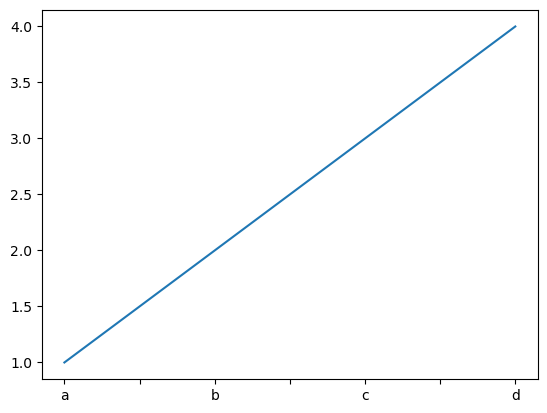

In [130]:
df['two'].plot()

# Полезные ссылки и доп материалы

Освоить основы каждой библиотеки за 10-15 минут:
#### numpy
https://docs.scipy.org/doc/numpy/user/quickstart.html
#### pandas
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

#### matplotlib

https://matplotlib.org/3.1.1/tutorials/index.html